In [1]:
import KNearest_Neighbors_Algorithm as knna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint

In [2]:
# Plot settings
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=16)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, top=True, direction="in")  # skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=16)
plt.rc("legend", fontsize=16)

In [3]:
# Function for calculating validation accuracy for classifier
def find_validation_accuracy(test_guesses, test_labels):
    num_correct = 0.0
    for guess, label in zip(test_guesses,test_labels):
        if guess == label:
            num_correct += 1
    return num_correct / len(test_guesses)

# Function for calculating validation accuracy for regressor
def find_validation_accuracy_regressor(test_guesses, test_labels):
    dist = 0.0
    for guess, label in zip(test_guesses,test_labels):
        dist += (guess - label)**2
    return dist

In [4]:
# Classification Data
# 
# Column 0: age
# Column 1: likes pineapple

# Creating data
data = pd.DataFrame([[randint(15,75),randint(0,1)] for i in range(1000)], columns=['age', 'like_pinapple'])
x = data[['age']]
y = data['like_pinapple']

# Min-Max normalizing the data
scaler = MinMaxScaler()
scaler.fit(x)
transformed_x = scaler.transform(x)

# Split data in training- and test-data
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, train_size=0.8, random_state=0)

# Making classifier and fitting to data
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

# Testing classifier
guesses = classifier.predict(X_test)

# Calculate validation accuracy
accuracy = find_validation_accuracy(guesses, y_test)
print(accuracy)

0.51


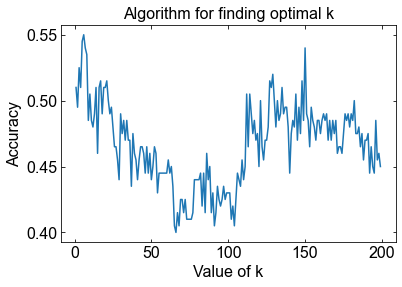

In [5]:
# Algorithm for finding optimal k

# Data setup
ks = range(1,200)
acs = []

# Calculating ks
for k in ks:
    # Making classifier and fitting to data
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    
    # Testing classifier
    guesses = classifier.predict(X_test)

    # Calculate validation accuracy
    accuracy = find_validation_accuracy(guesses, y_test)
    acs.append(accuracy)

# Plotting results
plt.plot(ks,acs)
plt.title('Algorithm for finding optimal k')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.show()

In [6]:
# Regression Data
# 
# Column 0: age
# Column 1: income

# Creating data
data_r = pd.DataFrame([[randint(15,75),randint(0,100000)] for i in range(1000)], columns=['age', 'income'])
x_r = data_r[['age']]
y_r = data_r['income']

# Min-Max normalizing the data
scaler_r = MinMaxScaler()
scaler_r.fit(x_r)
transformed_x_r = scaler_r.transform(x_r)

# Split data in training- and test-data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(transformed_x_r, y_r, test_size=0.2, train_size=0.8, random_state=0)

# Making regressor and fitting to data
regressor = KNeighborsRegressor(n_neighbors = 50, weights = "distance")
regressor.fit(X_train_r, y_train_r)

# Testing regressor
guesses_r = classifier.predict(X_test_r)

# Calculate validation accuracy
accuracy_r = find_validation_accuracy_regressor(guesses_r, y_test_r)
print(accuracy_r)

667173418877.0


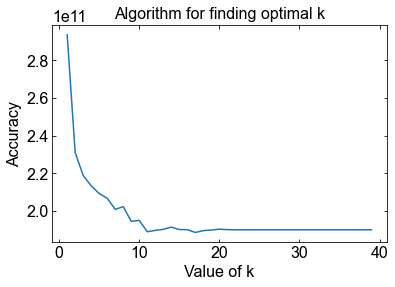

In [7]:
# Algorithm for finding optimal k

# Data setup
ks_r = range(1,40)
acs_r = []

# Calculating ks
for k in ks_r:
    # Making regressor and fitting to data
    regressor = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    regressor.fit(X_train_r, y_train_r)
    
    # Testing regressor
    guesses_r = regressor.predict(X_test_r)
    
    # Calculate validation accuracy
    accuracy_r = find_validation_accuracy_regressor(guesses_r, y_test_r)
    acs_r.append(accuracy_r)

# Plotting results
plt.plot(ks_r,acs_r)
plt.title('Algorithm for finding optimal k')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.show()